## Sandbox for different parameters


This notebook provides a sandbox for a user to try different parameter combinations and look at the frequency timeseries that is produced


## Setup 

In [2]:
import os 
os.environ['TEMPO2'] = '/fred/oz022/tkimpson/tempo2/T2runtime' # set the environment variable
import libstempo

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys 
sys.path.append("../scripts")
from generate_frequency_timeseries import process_pulsar_files

In [5]:
import libstempo.toasim as toasim
import matplotlib.pyplot as plt 

## Example 1 

In [6]:
import glob
path_to_data = '../mdc/IPTA_Challenge1_open/Challenge_Data/Dataset1/'
list_of_par_files = sorted(glob.glob(path_to_data+'/*.par'))
list_of_tim_files = sorted(glob.glob(path_to_data+'/*.tim'))
assert len(list_of_par_files) == len(list_of_tim_files)

In [7]:
#Pick a particular pulsar
psr_idx = 0
par_file = list_of_par_files[psr_idx]
tim_file = list_of_tim_files[psr_idx]

Processing pulsar J0030+0451


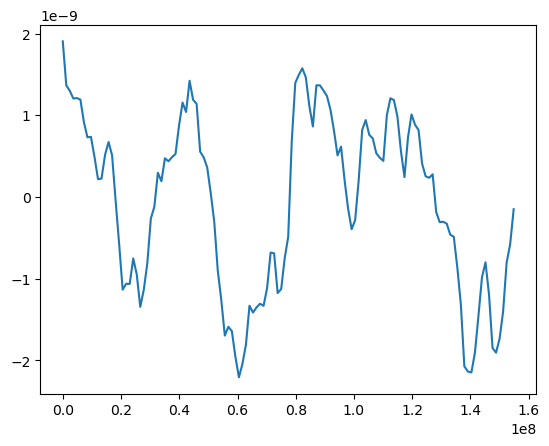

In [9]:
noise_seed = 1 
gwAmp = 5e-12
gwb = toasim.GWB(ngw=int(1e3),
                 seed=noise_seed,
                 gwAmp=gwAmp,
                 alpha=-2/3)

psr_alpha = 1.7
psr_amplitude = 0.0
efac = 1.0
t,f, F0,F1,DECJ,RAJ,_,_ = process_pulsar_files(par_file,tim_file,noise_seed,gwb,psr_alpha,psr_amplitude,efac)

plt.plot(t,f)


...and again we can add back on the secular trend

# Values of sigma p 

In [ ]:
import sdeint



def plot_OU(γp,σp):
    #Integrate the state equation
    #e.g. https://pypi.org/project/sdeint/
    def f_func(x,t):
        return γp*x
    def g_func(x,t):
        return σp



    #Initial conditions
    generator = np.random.default_rng(2)        # Random seeding
    initial_f = f[0]

    #Integration step
    f_OU= sdeint.itoint(f_func,g_func,initial_f, t,generator=generator) #This has shape (Ntimes x Npsr)

    plt.plot(t,f,label='liubstepo')
    plt.plot(t,f_OU,label='OU')
    plt.legend()
    plt.show()
